# Datawarehouse /ETL project

- Load the data from a employee_compensation.CSV into python , Retrieve the data as required in the questions below and load the result sets(respective df’s ) as tables into the database.
- Note: create new db
- All the required processing should be done in python.

In [275]:
! pip install pandas
! pip install sqlalchemy
! pip install matplotlib

In [276]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import text
import matplotlib.pyplot as plt

In [277]:
username = 'root'
password = 'root'
host = 'localhost'
database = 'warehousing_demo'
connection_string = f"mysql+pymysql://{username}:{password}@{host}/{database}"

engine = create_engine(connection_string)

In [278]:
df = pd.read_csv("Employee_Compensation.csv")
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,3,1400,1404,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790,"SEIU, Local 1021, Misc",...,37486688.0,60720.01,0.00,0.00,60720.01,13653.20,14733.76,4904.34,33291.30,94011.31
1,3,9700,9703,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535,"SEIU, Local 1021, Misc",...,39646203.0,91677.00,0.00,0.00,91677.00,17524.20,14733.76,7411.13,39669.09,131346.09
2,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535,"SEIU, Local 1021, Misc",...,37486043.0,89106.03,0.00,1540.00,90646.03,17327.20,14733.76,7401.92,39462.88,130108.91
3,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535,"SEIU, Local 1021, Misc",...,37615772.0,85581.11,3355.94,337.75,89274.80,16359.16,14151.56,7096.21,37606.93,126881.73
4,3,2900,2905,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535,"SEIU, Local 1021, Misc",...,37500212.0,86457.00,0.00,2090.00,88547.00,16925.97,14733.76,7257.89,38917.62,127464.62


In [279]:
df.to_sql(name="employee_compensation", con=engine, if_exists='replace', index=False)

66111

In [280]:
list(df.columns)

['Organization Group Code',
 'Job Family Code',
 'Job Code',
 'Year Type',
 'Year',
 'Organization Group',
 'Department Code',
 'Department',
 'Union Code',
 'Union',
 'Job Family',
 'Job',
 'Employee Identifier',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health and Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation']

In [281]:
def save(data: pd.DataFrame, table_name: str):
    data.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

1. **Top Earners Analysis:**
 - Which 10 employees had the highest total compensation in 2023, and what were their respective 
job titles and departments?


In [282]:
query = """
SELECT `Employee Identifier`, Job, Department, `Total Compensation`
FROM employee_compensation
WHERE Year = 2022
ORDER BY `Total Compensation` DESC
LIMIT 10;
"""

top_earners = pd.read_sql(query, engine)
top_earners

,Employee Identifier,Job,Department,Total Compensation
0,51036548.0,Managing Director,Retirement Services,675097.25
1,51806587.0,Sup Psychiatric Physician Spec,Public Health,523098.33
2,50865631.0,Senior Deputy Sheriff,Sheriff,519690.99
3,47392897.0,Asst Chf of Dept (Fire Dept),Fire Department,513434.46
4,47397932.0,"Captain, Fire Suppression",Fire Department,508115.68
5,50865822.0,Police Officer 3,Police,507131.18
6,47387259.0,"Captain, Fire Suppression",Fire Department,503102.14
7,50855775.0,Asst Med Examiner,Administrative Services,488239.38
8,50852997.0,Sergeant 3,Police,487157.26
9,51398510.0,Asst Chf of Dept (Fire Dept),Fire Department,476846.01


In [283]:
top_earners = df[df['Year'] == 2022].nlargest(10, 'Total Compensation')[['Employee Identifier', 'Job', 'Department', 'Total Compensation']]

top_earners

,Employee Identifier,Job,Department,Total Compensation
61306,51036548.0,Managing Director,Retirement Services,675097.25
31247,51806587.0,Sup Psychiatric Physician Spec,Public Health,523098.33
61082,50865631.0,Senior Deputy Sheriff,Sheriff,519690.99
26480,47392897.0,Asst Chf of Dept (Fire Dept),Fire Department,513434.46
26587,47397932.0,"Captain, Fire Suppression",Fire Department,508115.68
30503,50865822.0,Police Officer 3,Police,507131.18
26635,47387259.0,"Captain, Fire Suppression",Fire Department,503102.14
30159,50855775.0,Asst Med Examiner,Administrative Services,488239.38
62117,50852997.0,Sergeant 3,Police,487157.26
29834,51398510.0,Asst Chf of Dept (Fire Dept),Fire Department,476846.01


In [284]:
save(top_earners, 'top_earners')

2. **Union Impact Study:**
 - How does the average total salary of employees who belong to Union Code "X" compare to those 
who belong to Union Code "Y" over the last five years?

In [285]:
query = """
SELECT Year, `Union Code`, AVG(`Total Salary`) as `Average Salary`
FROM employee_compensation
WHERE Year BETWEEN 2018 AND 2022
GROUP BY Year, `Union Code`
ORDER BY Year, `Union Code`;
"""

union_comparison_all = pd.read_sql(query, engine)
union_comparison_all

,Year,Union Code,Average Salary
0,2018,1,80402.207143
1,2018,2,124816.054848
2,2018,3,108770.521579
3,2018,4,80818.037750
4,2018,6,125544.778617
...,...,...,...
318,2022,858,223266.281389
319,2022,911,177242.026643
320,2022,930,137348.101579
321,2022,933,16682.146923


In [286]:
union_comparison_all = df[(df['Year'] >= 2018) & (df['Year'] <= 2022)].groupby(['Year', 'Union Code'])['Total Salary'].mean().reset_index()
union_comparison_all = union_comparison_all.pivot(index='Year', columns='Union Code', values='Total Salary')

union_comparison_all

Union Code,1,2,3,4,6,7,12,16,21,22,...,799,856,858,911,929,930,933,965,969,990
Year,,,,,,,,,,,,,,,,,,,,,
2018,80402.207143,124816.054848,108770.521579,80818.037750,125544.778617,98312.510,97819.830,56219.027857,96368.193752,86036.383846,...,207700.617273,84499.036471,166241.486818,143265.604240,157916.33,112584.926897,10723.063158,111680.490000,209710.82,348815.03
2019,57546.875000,120601.160968,110825.416429,77142.340233,123985.845238,91899.210,97373.050,56533.062857,98736.445322,87016.505154,...,209621.271111,74588.208788,183270.308056,144667.980169,164224.71,123979.021333,12540.516842,116107.273000,NaN,294037.07
2020,34051.020000,123700.567500,119943.341429,88679.779706,130444.493839,97997.170,58428.805,44702.975238,110327.362409,96310.719370,...,282550.751053,111206.889375,199624.492069,157262.875262,NaN,104271.017500,14547.776000,107455.230000,NaN,390376.04
2021,72650.356667,154615.183333,116537.431818,86962.435455,124793.350888,108003.375,11449.710,67938.296364,117690.308875,100674.928527,...,269084.161500,85851.527742,228103.999355,157310.066013,132955.81,112658.119375,15193.113333,130794.572222,NaN,74175.36
2022,55427.150000,109190.706400,120702.764545,99734.531429,129450.841992,NaN,109362.760,67733.464211,118151.597914,101477.039733,...,300581.275000,109355.638276,223266.281389,177242.026643,NaN,137348.101579,16682.146923,136497.751429,NaN,NaN


In [287]:
save(union_comparison_all, 'union_comparison_all')

3. **Salary Trends by Job Family:**
 - What are the year-over-year percentage changes in the average total salary for the "Construction Inspection" 
Job Family from 2015 to 2023?


In [288]:
query = """
SELECT Year, `Job Family`, AVG(`Total Salary`) as `Average Salary`
FROM employee_compensation
WHERE `Job` = 'Engineer' AND Year BETWEEN 2015 AND 2023
GROUP BY Year, `Job Family`
ORDER BY Year;
"""

salary_trends = pd.read_sql(query, engine)

# Calculate year-over-year percentage changes
salary_trends['Percentage Change'] = salary_trends['Average Salary'].pct_change() * 100
salary_trends

,Year,Job Family,Average Salary,Percentage Change
0,2017,Professional Engineering,148151.651515,NaN
1,2018,Professional Engineering,150040.161273,1.274714
2,2019,Professional Engineering,145760.406522,-2.852406
3,2020,Professional Engineering,161296.728036,10.658808
4,2021,Professional Engineering,170102.529787,5.459380
5,2022,Professional Engineering,165201.622449,-2.881149


In [289]:
salary_trends = df[(df['Job'] == 'Engineer') & (df['Year'].between(2015, 2023))].groupby(['Year', 'Job Family'])['Total Salary'].mean().reset_index()
salary_trends['Percentage Change'] = salary_trends.groupby('Job Family')['Total Salary'].pct_change() * 100

salary_trends

,Year,Job Family,Total Salary,Percentage Change
0,2017,Professional Engineering,148151.651515,NaN
1,2018,Professional Engineering,150040.161273,1.274714
2,2019,Professional Engineering,145760.406522,-2.852406
3,2020,Professional Engineering,161296.728036,10.658808
4,2021,Professional Engineering,170102.529787,5.459380
5,2022,Professional Engineering,165201.622449,-2.881149


In [290]:
save(salary_trends, 'salary_trends')

4. **Departmental Benefits Allocation:**
 - Which department has the highest average total benefits per employee, and how does this 
average compare to the overall average total benefits across all departments?

In [291]:
query = """
SELECT Department, AVG(`Total Benefits`) as `Average Total Benefits`
FROM employee_compensation
GROUP BY Department
ORDER BY `Average Total Benefits` DESC;
"""

department_benefits = pd.read_sql(query, engine)

highest_avg_benefits = department_benefits.iloc[0]['Average Total Benefits']
other_departments_benefits = department_benefits.iloc[1:]['Average Total Benefits']

correlation = other_departments_benefits.corr(other_departments_benefits)
correlation

np.float64(0.9999999999999998)

In [292]:
highest_avg_benefits

np.float64(68290.33333333333)

In [293]:
department_benefits

,Department,Average Total Benefits
0,Law Library,68290.333333
1,Dept of Early Childhood,54310.732500
2,City Attorney,50504.437303
3,Sheriff,49933.644155
4,Retirement Services,46583.810181
5,Public Defender,45939.607801
6,District Attorney,43438.420741
7,Ethics Commission,41320.872593
8,Controller,40764.887179
9,Economic Workforce Development,40611.549299


In [294]:
other_departments_benefits

1     54310.732500
2     50504.437303
3     49933.644155
4     46583.810181
5     45939.607801
6     43438.420741
7     41320.872593
8     40764.887179
9     40611.549299
10    40605.181077
11    40442.252680
12    40406.899825
13    40379.683204
14    40294.794210
15    39928.311822
16    39569.328119
17    38542.005750
18    38037.627252
19    37985.948228
20    37860.558499
21    37735.533298
22    37647.932114
23    37279.136628
24    36999.455882
25    36727.874545
26    36413.870058
27    36256.857904
28    35801.767632
29    35349.025405
30    35321.813856
31    35057.875446
32    34616.856926
33    33571.337597
34    33064.139227
35    32611.633648
36    32054.713229
37    31505.965816
38    28605.031058
39    28520.867536
40    28318.834921
41    28216.514765
42    28195.710000
43    27941.560072
44    27822.622665
45    26919.141567
46    26401.759444
47    23881.222105
48    23374.544545
49    22535.556883
50    19104.296911
51    17143.391875
52    14886.702537
53     4504.

5. **Overtime Analysis by Organization Group:**
 - What is the correlation between overtime pay and total compensation within the "Public Safety" 
Organization Group, and how does this correlation vary by job code?


In [ ]:
query = """
SELECT Job, (AVG(Overtime * `Total Compensation`) - AVG(Overtime) * AVG(`Total Compensation`)) / (STDDEV(Overtime) * STDDEV(`Total Compensation`)) as Correlation
FROM employee_compensation
WHERE `Organization Group` = 'Public Protection'
GROUP BY Job;
"""

overtime_correlation = pd.read_sql(query, engine)
overtime_correlation    

,Job,Correlation
0,Sergeant 3,0.794351
1,Police Officer 3,0.728330
2,Lieutenant 3,0.598344
3,Community Police Services Aide,0.440528
4,Sergeant 2,0.589490
...,...,...
306,Auditor III,NaN
307,Dep Dir II,NaN
308,Auto Svc Wrk Asst Sprv,NaN
309,Stores & Equip Asst Sprv,NaN


In [297]:
overtime_correlation = df[df['Organization Group'] == 'Public Protection'].groupby('Job')[['Overtime', 'Total Compensation']].corr().iloc[0::2,-1]

overtime_correlation

Job                                    
ACPO,JuvP, Juv Prob (SFERS)    Overtime         NaN
Account Clerk                  Overtime         NaN
Accountant II                  Overtime         NaN
Accountant III                 Overtime         NaN
Accountant IV                  Overtime         NaN
                                             ...   
Undersheriff                   Overtime         NaN
Undersheriff (SFERS)           Overtime    1.000000
Victim/Witness Investigator 1  Overtime    0.252920
Victim/Witness Investigator 2  Overtime    0.322607
Victim/Witness Investigator 3  Overtime   -0.058803
Name: Total Compensation, Length: 311, dtype: float64

6. **Compensation Distribution by Year Type:**
 - In non-calendar years, which job codes have the highest variance in total compensation, and 
what are the potential factors contributing to this variance?

In [ ]:
query = """
SELECT Job, VARIANCE(`Total Compensation`) as Variance
FROM employee_compensation
WHERE `Year Type` = 'Fiscal'
GROUP BY Job
ORDER BY Variance DESC;
"""

comp_distribution = pd.read_sql(query, engine)
comp_distribution = comp_distribution.sort_values(by='Variance', ascending=False)
comp_distribution

,Job,Variance
0,Dep Chf of Dept (Fire Dept),7.651945e+10
1,Managing Director,4.322329e+10
2,Asst Med Examiner,4.254841e+10
3,"Manager, Dept Public Health",2.764258e+10
4,Asst Chf of Dept (Fire Dept),2.643526e+10
...,...,...
986,Apr Elec Instr Tech Wtr Poll I,0.000000e+00
987,Principal Museum Preparator,0.000000e+00
988,Real Prop Appraiser Trainee,0.000000e+00
989,Administrative Analyst I,0.000000e+00


In [298]:
comp_distribution = df[df['Year Type'] == 'Fiscal'].groupby('Job')['Total Compensation'].var().reset_index()
comp_distribution = comp_distribution.sort_values(by='Total Compensation', ascending=False)

comp_distribution

,Job,Total Compensation
268,Dep Chf of Dept (Fire Dept),1.147792e+11
527,"Manager, Dept Public Health",5.528516e+10
529,Managing Director,5.402911e+10
100,Asst Med Examiner,5.105809e+10
374,Fire Protection Engineer,3.176034e+10
...,...,...
950,Undersheriff (SFERS),NaN
970,Water Const&Main Supt,NaN
982,Wharfinger 1,NaN
985,Window Cleaner Supervisor,NaN


In [299]:
save(comp_distribution, "comp_distribution")

7. **Union Benefits Comparison:**
 - Among employees in Union Code "Z", which job family receives the highest average retirement 
benefits, and how does this compare to the same job family's health and dental benefits?

In [ ]:
query = """SELECT `Job Family`, `Union Code`, AVG(Retirement) as Average_Retirement_Benefits, AVG(`Health and Dental`) as Average_Health_Dental_Benefits
FROM employee_compensation
GROUP BY `Job Family`, `Union Code`
ORDER BY Average_Retirement_Benefits DESC
"""

union_benefits = pd.read_sql(query, engine)
union_benefits

,Job Family,Union Code,Average_Retirement_Benefits,Average_Health_Dental_Benefits
0,Correction & Detention,556,150142.960000,20518.480000
1,Unassigned,351,91900.668750,19402.687500
2,Street Transit,302,70139.380000,19223.725000
3,Correction & Detention,351,63953.590000,10761.851250
4,Management,2,63340.445000,17312.895000
...,...,...,...,...
222,Untitled,933,1.118804,5418.613804
223,Untitled,330,0.000000,0.000000
224,Computer Operatns & Repro Svcs,200,0.000000,0.000000
225,MTA Operations,1,0.000000,3000.963333


In [300]:
union_benefits = df.groupby(['Job Family', 'Union Code'])[['Retirement', 'Health and Dental']].mean().reset_index()
union_benefits = union_benefits.sort_values(by='Retirement', ascending=False)

union_benefits

,Job Family,Union Code,Retirement,Health and Dental
40,Correction & Detention,556,150142.960000,20518.480000
208,Unassigned,351,91900.668750,19402.687500
184,Street Transit,302,70139.380000,19223.725000
37,Correction & Detention,351,63953.590000,10761.851250
96,Management,2,63340.445000,17312.895000
...,...,...,...,...
225,Untitled,933,1.118804,5418.613804
94,MTA Operations,1,0.000000,3000.963333
30,Computer Operatns & Repro Svcs,200,0.000000,0.000000
156,Public Service Aide,1,0.000000,0.000000


In [301]:
save(union_benefits, "union_benefits")

8. **Historical Salary Distribution:**
 - How has the distribution of total salaries for the "Management" Job Family changed from 2010 to 
2023, and what are the key factors influencing these changes?

In [ ]:
query = """
SELECT Year, `Job Family`, AVG(`Total Salary`) as Average_Salary
FROM employee_compensation
WHERE `Job Family` = 'Management' AND Year BETWEEN 2010 AND 2023
GROUP BY Year, `Job Family`
ORDER BY Year, `Job Family`;
"""
salary_distribution = pd.read_sql(query, engine)
salary_distribution

,Year,Job Family,Average_Salary
0,2017,Management,138627.048262
1,2018,Management,144993.500357
2,2019,Management,154561.545871
3,2020,Management,161080.674143
4,2021,Management,164219.823718
5,2022,Management,169592.981385


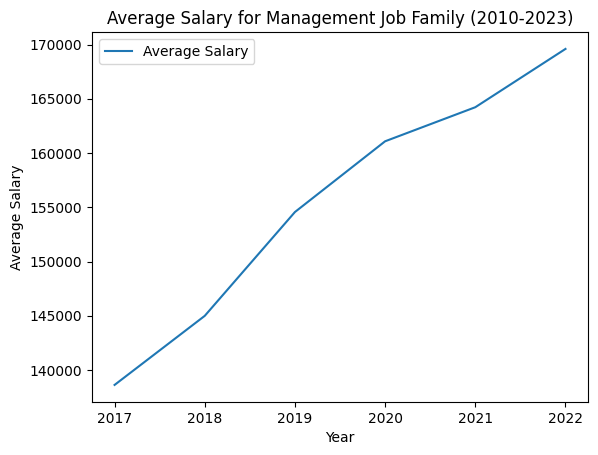

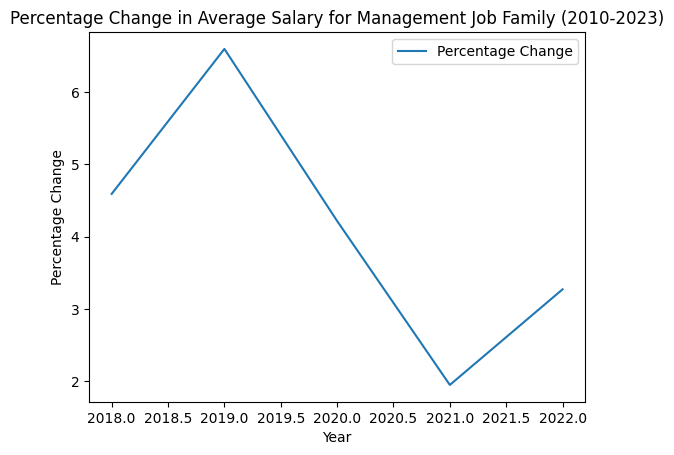

In [302]:
import pandas as pd

# Assuming the DataFrame 'df' is already loaded with the employee compensation data

# Historical Salary Distribution
salary_distribution = df[(df['Job Family'] == 'Management') & (df['Year'].between(2010, 2023))].groupby(['Year', 'Job Family'])['Total Salary'].mean().reset_index()
salary_distribution['Percentage Change'] = salary_distribution['Total Salary'].pct_change() * 100

# Plot the average salary over time
plt.plot(salary_distribution['Year'], salary_distribution['Total Salary'], label='Average Salary')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary for Management Job Family (2010-2023)')
plt.legend()
plt.show()

# Plot the percentage change in salary over time
plt.plot(salary_distribution['Year'], salary_distribution['Percentage Change'], label='Percentage Change')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Average Salary for Management Job Family (2010-2023)')
plt.legend()
plt.show()

In [303]:
save(salary_distribution, "salary_distribution")

9. **Department Growth Analysis:**
 - Identify the top three departments with the highest increase in total compensation from 2018 to 
2023, and analyze the underlying reasons for this increase.

In [ ]:
query = """
SELECT Department,
(MAX(`Total Compensation`) - MIN(`Total Compensation`)) AS Increase
FROM employee_compensation
WHERE Year BETWEEN 2018 AND 2023
GROUP BY Department
ORDER BY Increase DESC
LIMIT 3;
"""

growth_analysis = pd.read_sql(query, engine)
growth_analysis

,Department,Increase
0,Retirement Services,757106.97
1,Administrative Services,689237.88
2,Fire Department,668887.40


In [304]:
growth_analysis = df[(df['Year'].between(2018, 2023))]
growth_analysis = growth_analysis.groupby('Department')['Total Compensation'].agg(['min', 'max']).reset_index()
growth_analysis['Increase'] = growth_analysis['max'] - growth_analysis['min']
growth_analysis = growth_analysis.sort_values(by='Increase', ascending=False).head(3)

growth_analysis

,Department,min,max,Increase
47,Retirement Services,5577.07,762684.04,757106.97
1,Administrative Services,0.49,689238.37,689237.88
28,Fire Department,9.10,668896.50,668887.40


In [305]:
save(growth_analysis, 'growth_analysis')

10. **Employee Tenure and Compensation:**
 - For employees who have been in the same job code for at least 5 years, what are the trends in 
their total compensation, and how do these trends differ across different job families?

In [ ]:
query = """
SELECT `Job Family`,
AVG(`Total Compensation`) AS Average_Compensation,
STDDEV(`Total Compensation`) AS Standard_Deviation
FROM employee_compensation
WHERE (Year(CURDATE()) - Year) >= 5
GROUP BY `Job Family`
ORDER BY Average_Compensation DESC;
"""

tenure_vs_compensation = pd.read_sql(query, engine)
tenure_vs_compensation

,Job Family,Average_Compensation,Standard_Deviation
0,Administrative & Mgmt (Unrep),325887.306000,115591.100120
1,Construction Project Mgmt,202705.016818,52807.123244
2,Management,197961.664319,75337.771083
3,Administrative-DPW/PUC,193122.101463,28272.935905
4,Administrative-Labor & Trades,190153.192857,52864.156423
5,Port Operation,188907.143636,91418.874481
6,Medical & Dental,184828.847469,115357.711743
7,Fire Services,179405.382112,74766.520285
8,Police Services,178887.323847,67729.709333
9,Legal & Court,167341.777090,82556.146120


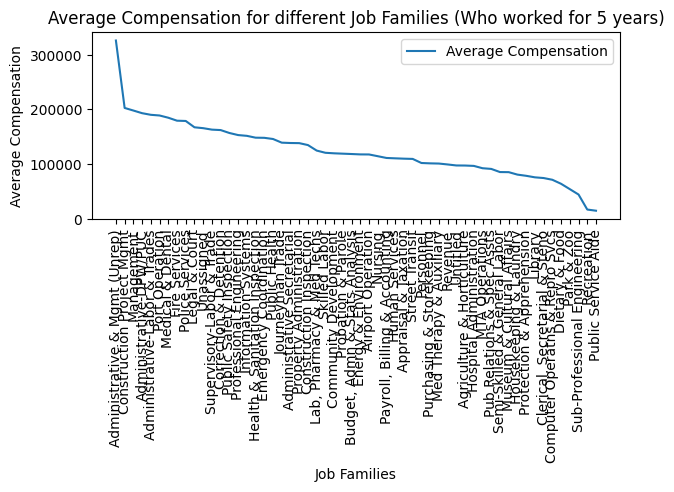

In [ ]:
plt.plot(tenure_vs_compensation['Job Family'], tenure_vs_compensation['Average_Compensation'], label='Average Compensation')
plt.xlabel('Job Families')
plt.ylabel('Average Compensation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Average Compensation for different Job Families (Who worked for 5 years)')
plt.legend()
plt.show()

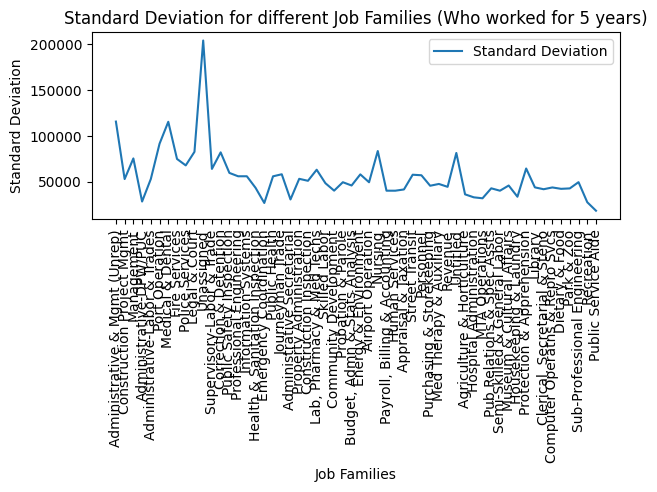

In [ ]:
plt.plot(tenure_vs_compensation['Job Family'], tenure_vs_compensation['Standard_Deviation'], label='Standard Deviation')
plt.xlabel('Job Families')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Standard Deviation for different Job Families (Who worked for 5 years)')
plt.legend()
plt.show()

In [306]:
tenure_vs_compensation = df[(df['Year'].apply(lambda x: pd.to_datetime('today').year - pd.to_datetime(x).year)) >= 5]
tenure_vs_compensation = tenure_vs_compensation.groupby('Job Family')['Total Compensation'].agg(['mean', 'std']).reset_index()
tenure_vs_compensation = tenure_vs_compensation.rename(columns={'mean': 'Average_Compensation', 'std': 'Standard_Deviation'})
tenure_vs_compensation = tenure_vs_compensation.sort_values(by='Average_Compensation', ascending=False)

tenure_vs_compensation

,Job Family,Average_Compensation,Standard_Deviation
0,Administrative & Mgmt (Unrep),366023.778214,158435.900075
54,Unassigned,247727.440952,291920.865756
28,Management,211345.891019,79096.510273
12,Construction Project Mgmt,205130.299207,60977.252064
30,Medical & Dental,203174.242192,130871.056623
2,Administrative-DPW/PUC,202681.193816,34772.501914
3,Administrative-Labor & Trades,198985.249000,83656.693396
17,Fire Services,194351.626627,83382.133536
36,Police Services,191114.854042,72458.129908
37,Port Operation,186708.082000,82571.604357


In [307]:
save(tenure_vs_compensation, "tenure_vs_compensation")